In [1]:
#Imports
import pandas as pd
import numpy as np
import os
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#skitlearn packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

<b>Load Data</b>

In [2]:
#load training data
app_train_df = pd.read_csv(r'./data/application_train.csv')

#save an original copy for future use
original_app_train_df = app_train_df.copy(deep=True)



In [3]:
print(f'Training data:')
print(f'Rows: {app_train_df.shape[0]}')
print(f'Attributes: {app_train_df.shape[1]}')

Training data:
Rows: 307511
Attributes: 122


In [4]:
#load testing data
app_test_df = pd.read_csv(r'./data/application_test.csv')

#save an original copy for future use
original_app_test_df = app_test_df.copy(deep=True)

In [5]:
print(f'Testing data:')
print(f'Rows: {app_test_df.shape[0]}')
print(f'Attributes: {app_test_df.shape[1]}')

Testing data:
Rows: 48744
Attributes: 121


<b>Exploratory Data Analysis (EDA)</b>
Looking into the data

In [6]:
#finding missing values in training df

missing_val = app_train_df.isnull().sum()
        
# % of missing values
missing_val_percent = 100 * app_train_df.isnull().sum() / len(app_train_df)

# making a table for both 
missing_val_table = pd.concat([missing_val, missing_val_percent], axis=1)

# Naming the cols
misssing_val_table1 = missing_val_table.rename(
columns = {0 : 'Missing Values', 1 : '% Missing Values'})

# Sort the table by percentage of missing descending
misssing_val_table1 = misssing_val_table1[misssing_val_table1.iloc[:,1] != 0
                                                     ].sort_values('% Missing Values', ascending=False).round(1)

# Print some summary information
print ("The dataframe has {} columns.\n".format(str(app_train_df.shape[1])),      
        "There are {} columns that have missing values.\n".format(str(misssing_val_table1.shape[0])),
       "There are {} columns that have no missing values".format(int(app_train_df.shape[1]) - int(misssing_val_table1.shape[0])) )



misssing_val_table1

The dataframe has 122 columns.
 There are 67 columns that have missing values.
 There are 55 columns that have no missing values


,Missing Values,% Missing Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


<b>Looking into Attributes(columns) and their Dataypes </b>

In [7]:
train_dtypes = pd.DataFrame(app_train_df.dtypes.value_counts()).reset_index()
train_dtypes

,index,0
0,float64,65
1,int64,41
2,object,16


In [8]:
# Listing all Attributes by their datatypes
columns = app_train_df.columns.to_series().groupby(app_train_df.dtypes).groups
for data_type in columns.keys():
    print('\nData Type {} Columns:'.format(data_type))
    pprint(list(columns[data_type]))


Data Type int64 Columns:
['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

Data Type float64 Columns:
['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',


In [9]:
# integer attributes
app_train_int_df = app_train_df.select_dtypes(include=['int'])
app_train_int_df.drop(columns=['SK_ID_CURR', 'TARGET'], axis=1, inplace=True)

# attributes which are actually categorical but represented as int, need to extract them
app_train_binary_cols = [column for column in app_train_int_df if (list(app_train_int_df[column].unique()) == [0, 1]) or (list(app_train_int_df[column].unique()) == [1, 0])]
app_train_int_df.shape

(307511, 39)

In [10]:
print(len(app_train_binary_cols))
print("attributes which are actually categorical but represented as int")
app_train_binary_cols

32
attributes which are actually categorical but represented as int


['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [11]:
# float attributes
app_train_float_df = app_train_df.select_dtypes(exclude=['int', 'object'])
app_train_float_df.shape

(307511, 65)

In [12]:
# categorical attributes
app_train_categorical_df = app_train_df.select_dtypes(exclude=['int', 'float'])
app_train_categorical_df.shape

(307511, 16)

In [13]:
import matplotlib.pyplot as plt
def correlation_matrix_plot(dataframe):
    cols = list(dataframe.columns)
    dataframe_corr = dataframe.corr()

    figure = plt.figure(figsize=(15,10))
    axis = figure.add_subplot(1,1,1)
    corr_axis = axis.matshow(dataframe_corr, interpolation='nearest')
    figure.colorbar(corr_axis)
    figure.show()

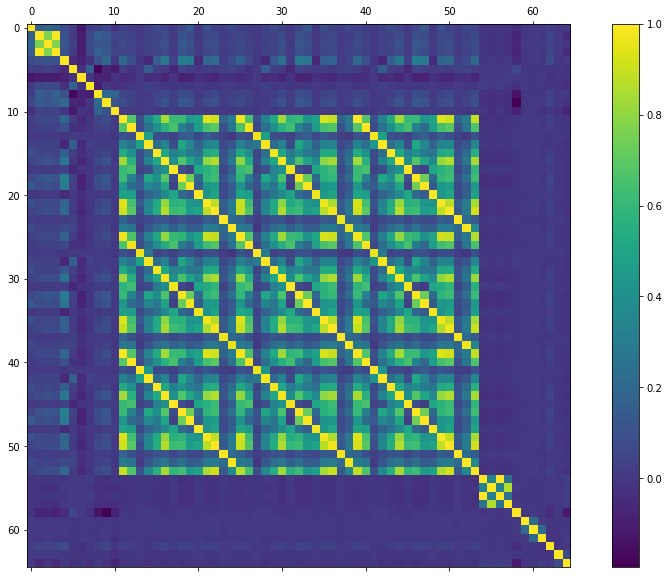

In [14]:
correlation_matrix_plot(app_train_float_df)

In [15]:
# column 11 till 53 has High correlation, which makes it a good candidate for dimentionality reduction!!
def perform_pca(dataframe):
    #noramlize
    min_max_scaler = MinMaxScaler()
    dataframe_normalized = min_max_scaler.fit_transform(dataframe)
    
    pca = PCA(n_components=10)
    transformed_component = pca.fit_transform(dataframe_normalized)
    cols = ['pca-{}'.format(i+1) for i in range(len(transformed_component[0,:]))]
    
    return (pca, pd.DataFrame(transformed_component, columns=cols))

In [16]:
app_train_float_df.columns[11:53]

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI'],
      dtype='object')

In [17]:
# All 11 till 53 features are related to applicant housing, applying PCA on them
pca_input = app_train_float_df.iloc[:, 11:53]
# populate missing values
pca_input = pca_input.fillna(method='ffill')
pca_input = pca_input.fillna(method='bfill')

pca, float_df_pca = perform_pca(pca_input)
float_df_pca.shape

(307511, 10)

In [18]:
float_df_pca.head()

,pca-1,pca-2,pca-3,pca-4,pca-5,pca-6,pca-7,pca-8,pca-9,pca-10
0,-0.483933,0.040854,-0.016445,0.140529,0.048228,-0.025305,0.065620,0.009953,-0.004988,0.017487
1,0.020276,-0.306236,-0.110619,-0.008581,0.055003,-0.024608,0.018189,-0.012047,-0.003639,0.034784
2,0.020276,-0.306236,-0.110619,-0.008581,0.055003,-0.024608,0.018189,-0.012047,-0.003639,0.034784
3,0.020276,-0.306236,-0.110619,-0.008581,0.055003,-0.024608,0.018189,-0.012047,-0.003639,0.034784
4,0.020276,-0.306236,-0.110619,-0.008581,0.055003,-0.024608,0.018189,-0.012047,-0.003639,0.034784


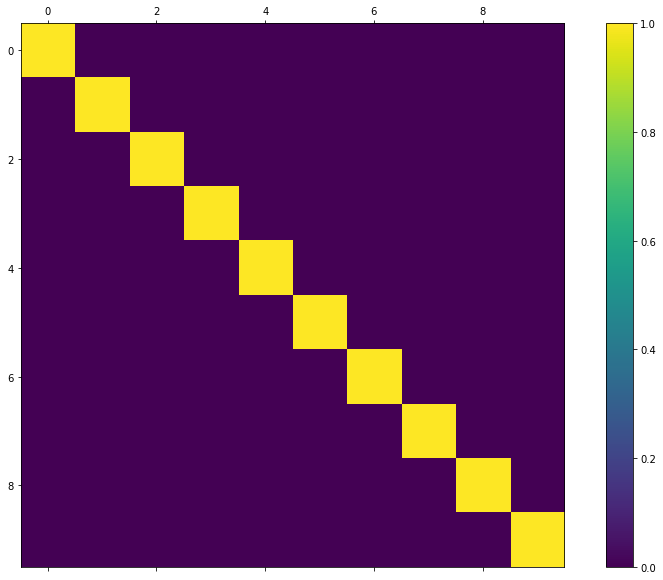

In [19]:
correlation_matrix_plot(float_df_pca)

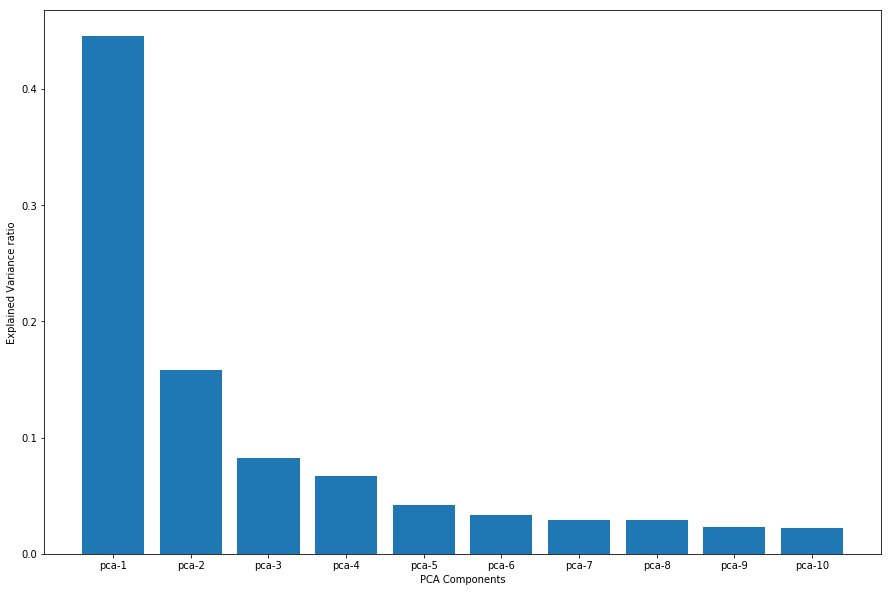

In [20]:
plt.figure(figsize=(15, 10))
plt.bar(float_df_pca.columns, pca.explained_variance_ratio_)
plt.ylabel('Explained Variance ratio')
plt.xlabel('PCA Components')
plt.show()

In [21]:
app_train_categorical_df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN


<b>Encoding Categorical Attributes</b>
converting values to either(1/0) or adding columns for each unique value of a class

1. Label encoding

In [22]:
le = LabelEncoder()
count = 0
cols_encoded=[]
for col in app_train_categorical_df:
    #if 2 or less unique categories
    if len(list(app_train_categorical_df[col].unique())) <= 2:
        print(f'{col} was encoded')
        le.fit(app_train_categorical_df[col])
        cols_encoded.append(col)
        #Transforming col
        app_train_categorical_df[col] = le.transform(app_train_categorical_df[col])
        
        count += 1
            
print(f'encoded {count} colmuns')
            
            

NAME_CONTRACT_TYPE was encoded
FLAG_OWN_CAR was encoded
FLAG_OWN_REALTY was encoded
encoded 3 colmuns


2. One-hot encoding

In [23]:
print(f'Shape before One-hot encoding Categorical df {app_train_categorical_df.shape}')
app_train_categorical_df = pd.get_dummies(app_train_categorical_df)
print(f'Shape after One-hot encoding Categorical df {app_train_categorical_df.shape}')

Shape before One-hot encoding Categorical df (307511, 16)
Shape after One-hot encoding Categorical df (307511, 137)


<b>Target label distribution</b>

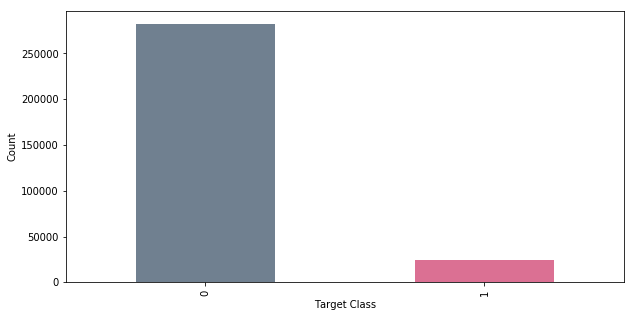

In [24]:
# Plot TARGET distribution
app_train_df['TARGET'].value_counts()
app_train_df['TARGET'].value_counts().plot(kind='bar', figsize=(10,5), color = ['slategrey', 'palevioletred'])
plt.xlabel('Target Class')
plt.ylabel('Count') 
plt.show()

<b>KDE plots</b>

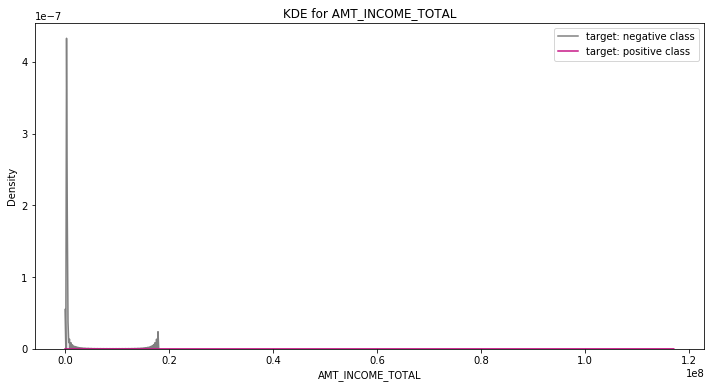

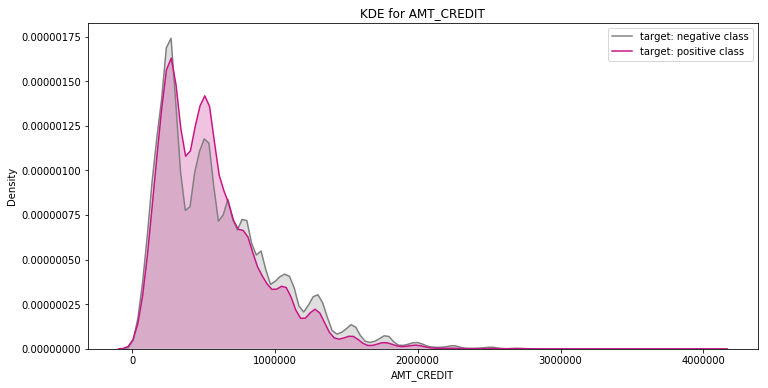

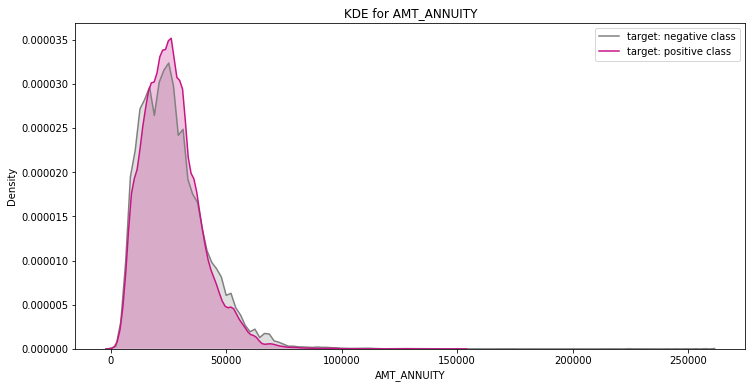

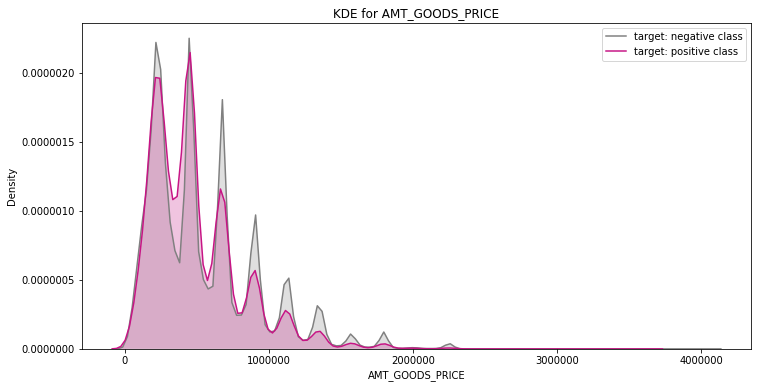

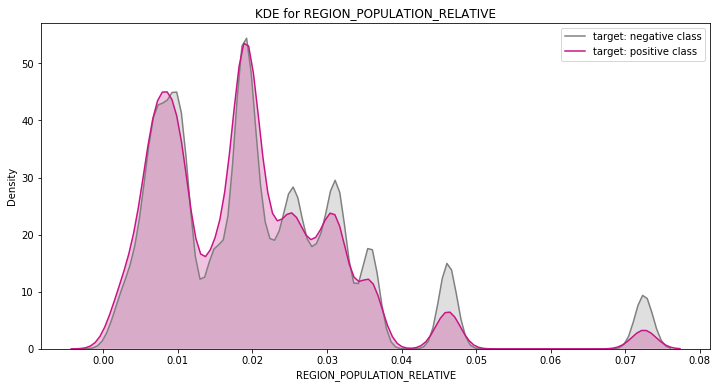

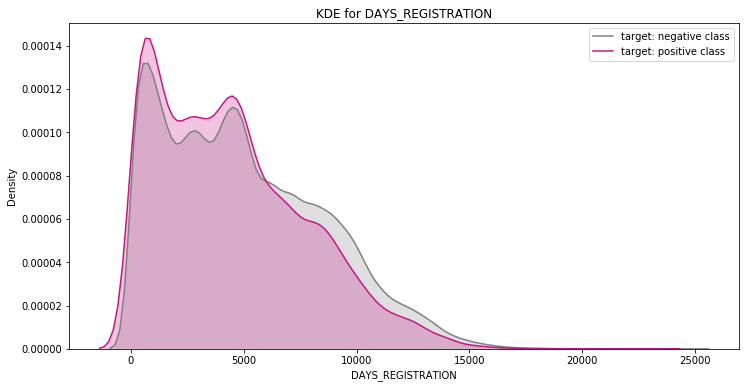

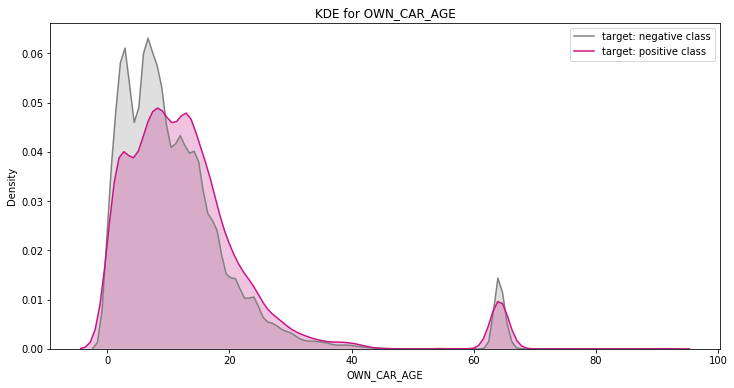

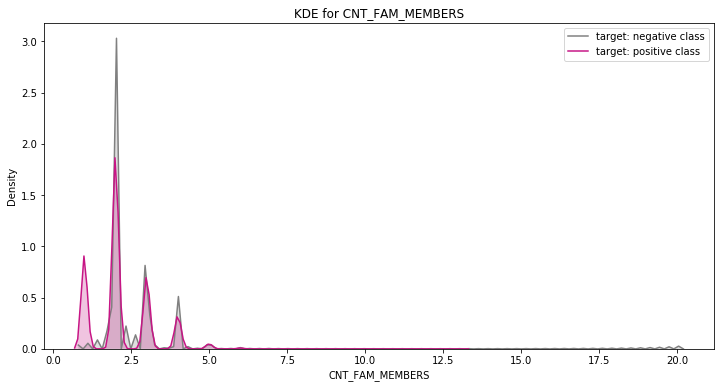

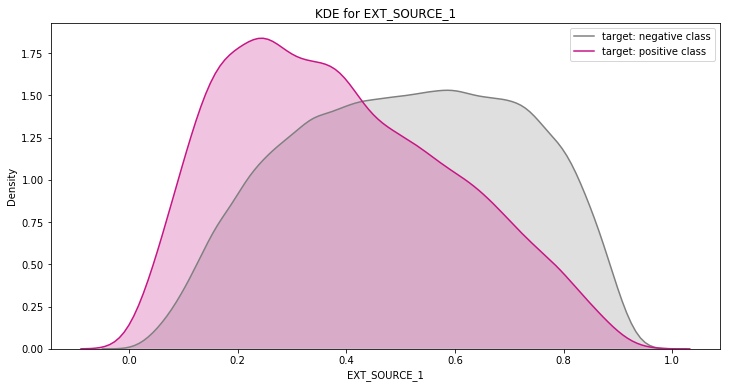

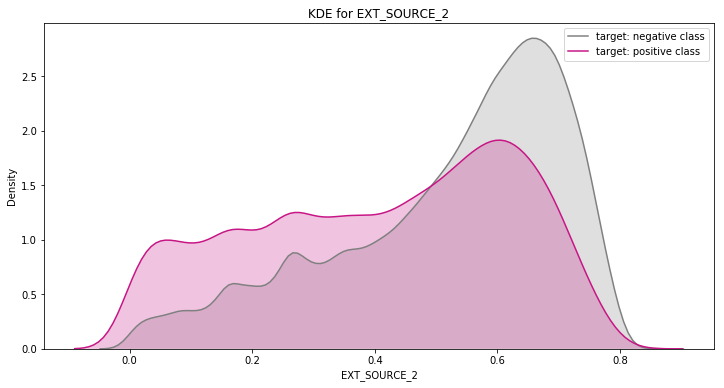

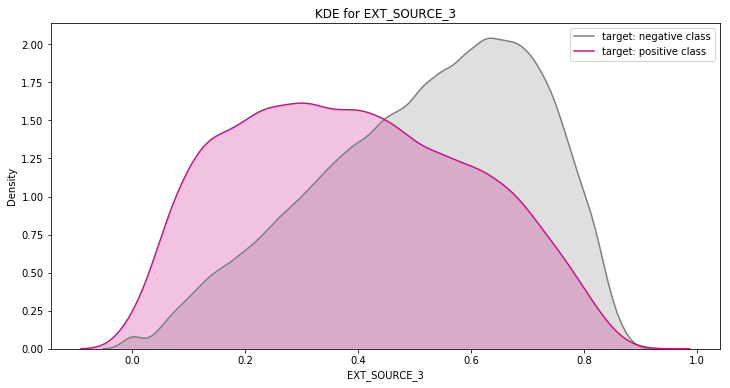

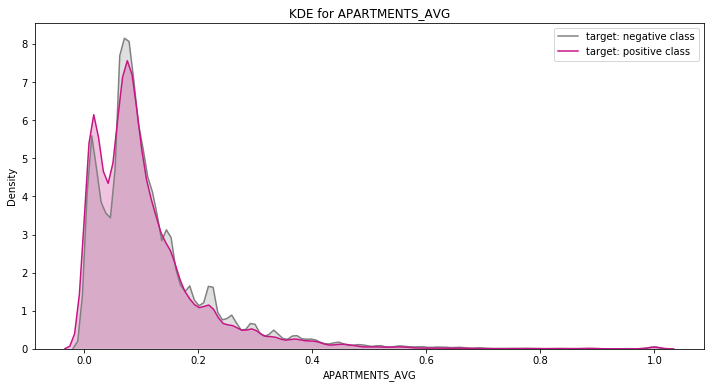

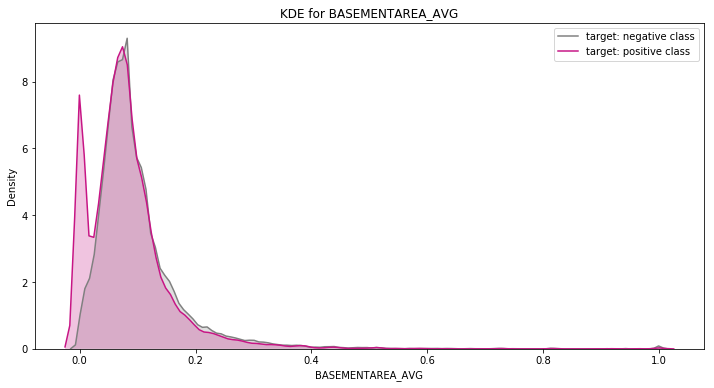

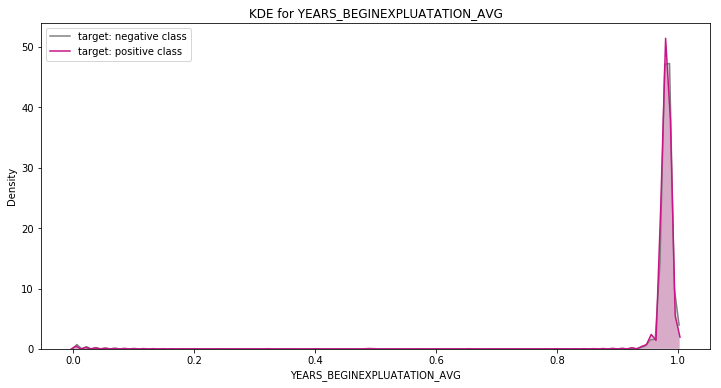

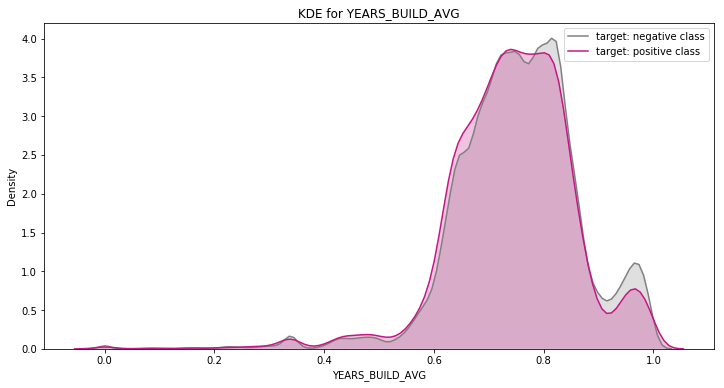

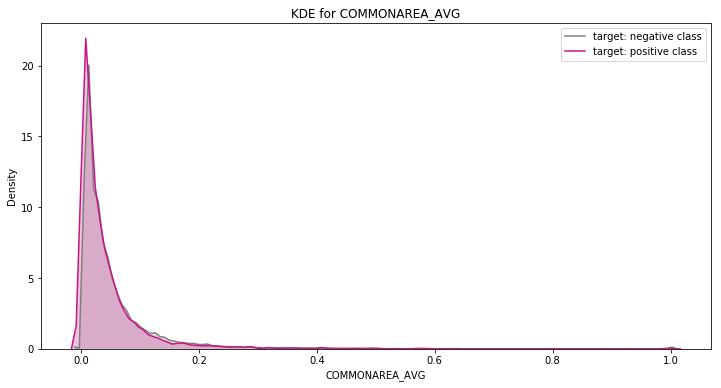

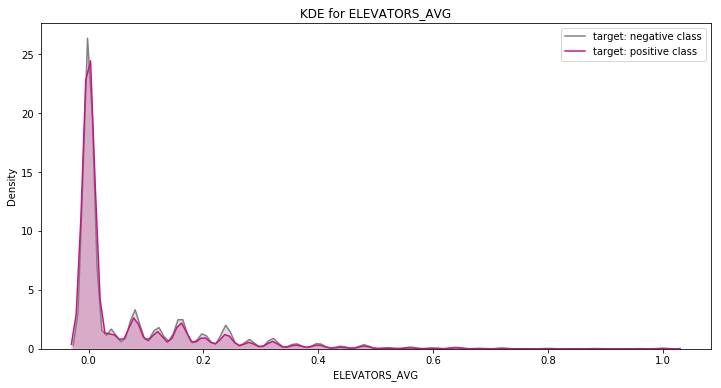

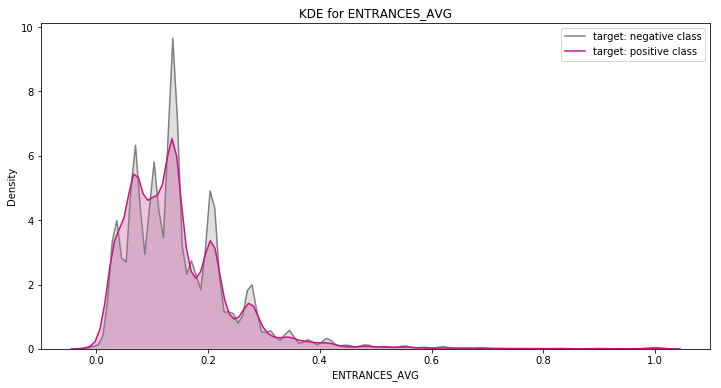

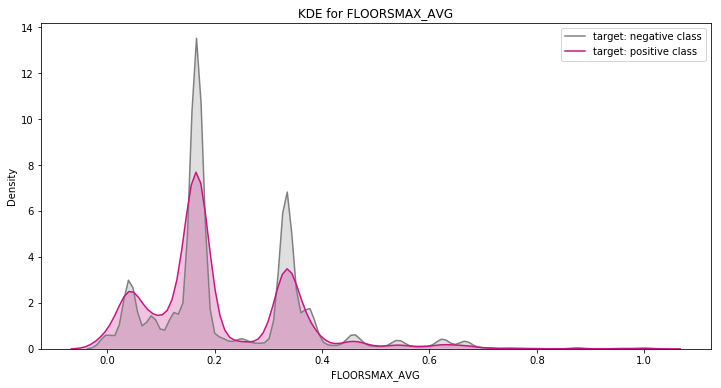

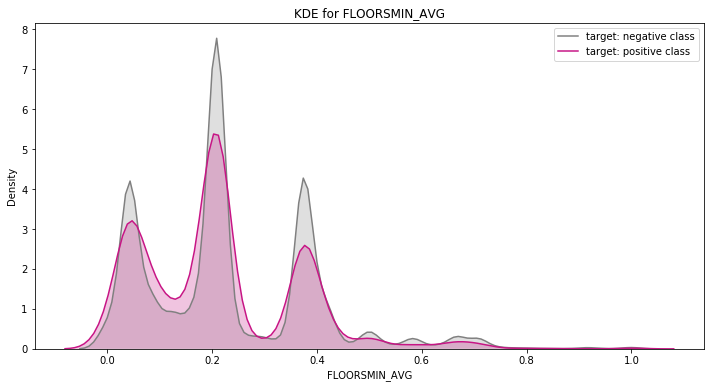

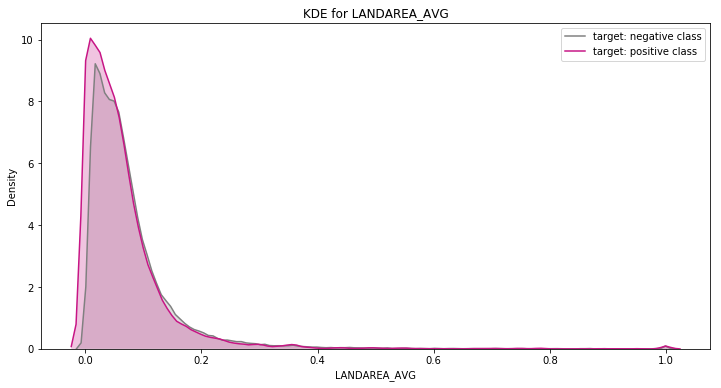

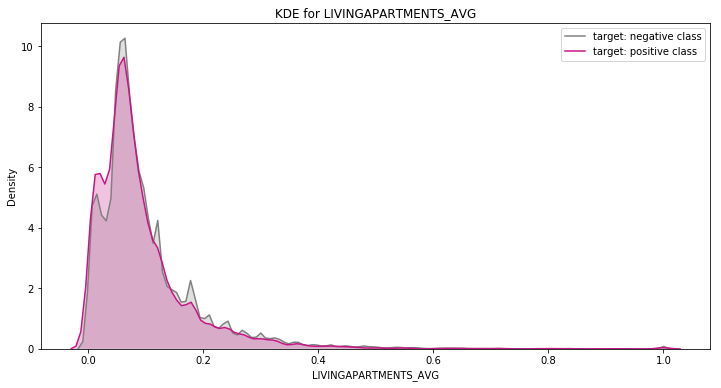

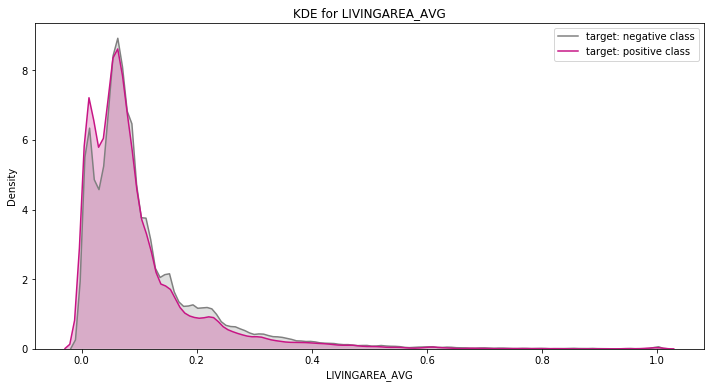

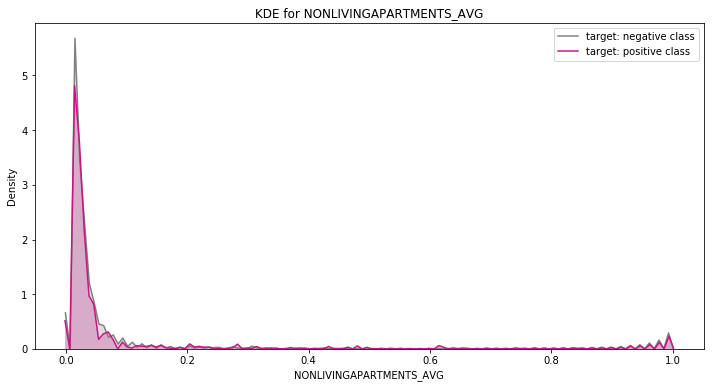

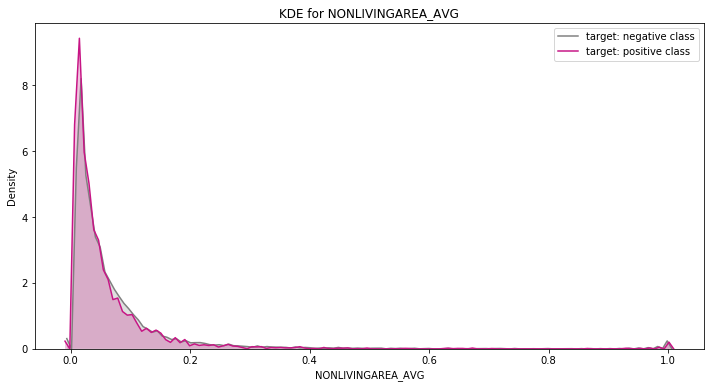

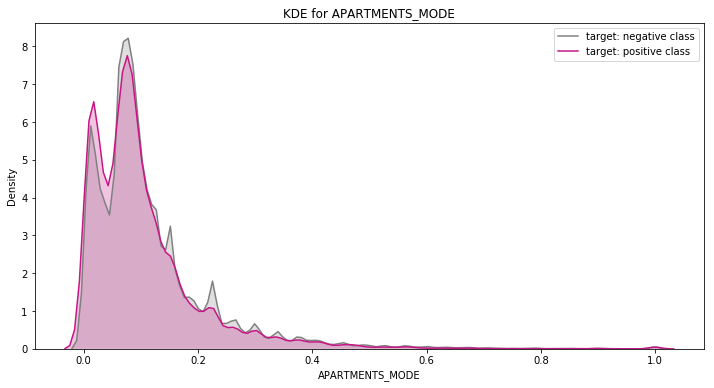

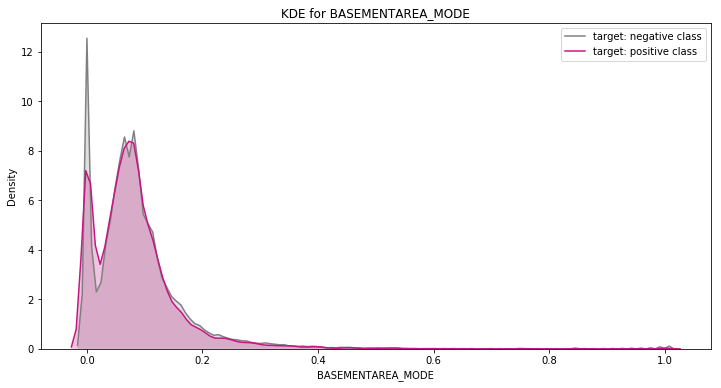

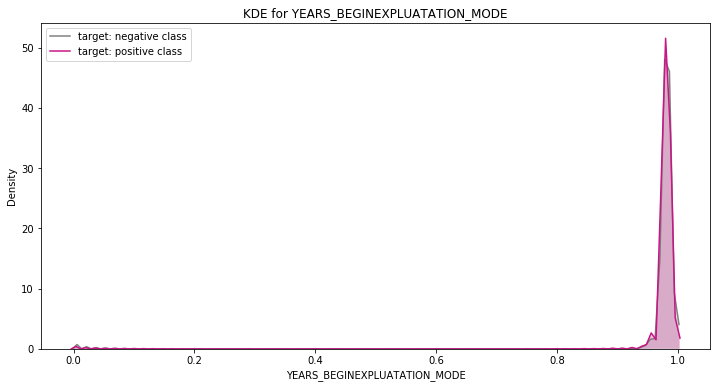

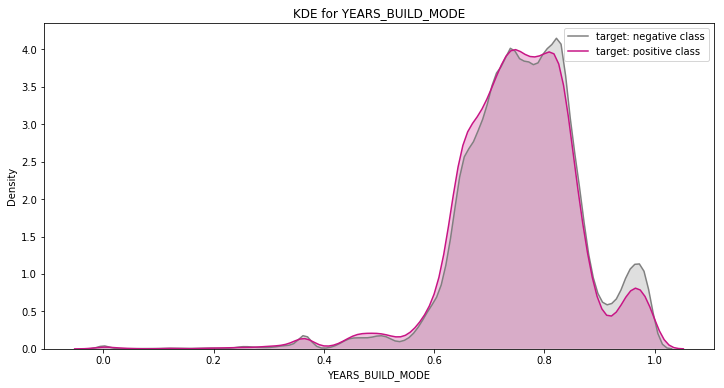

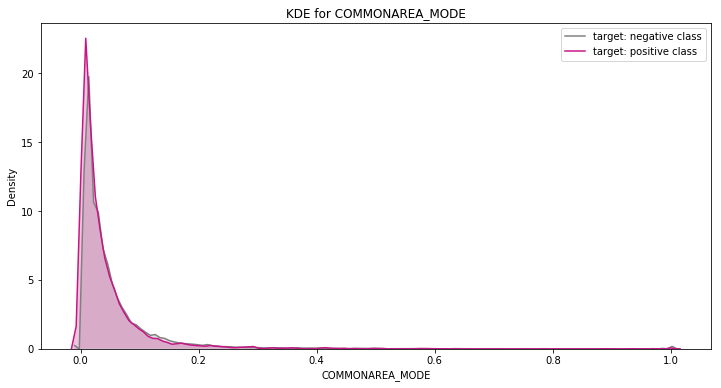

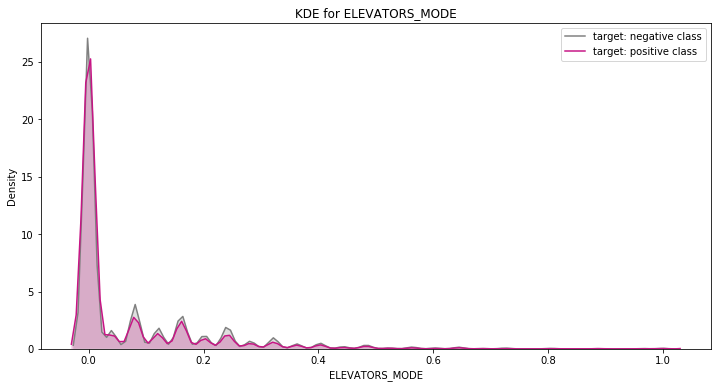

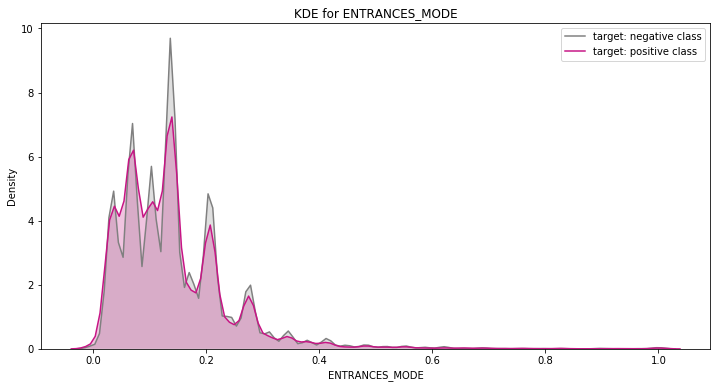

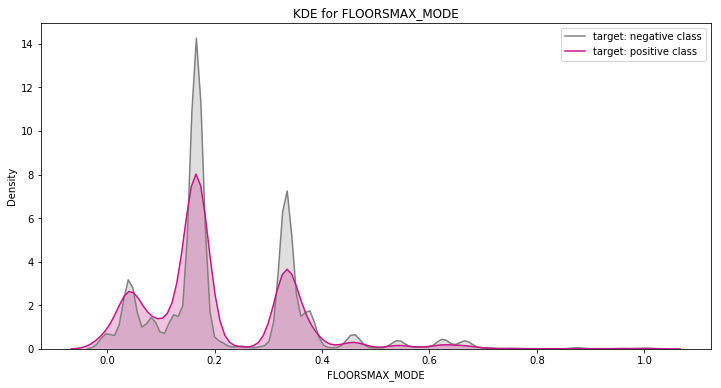

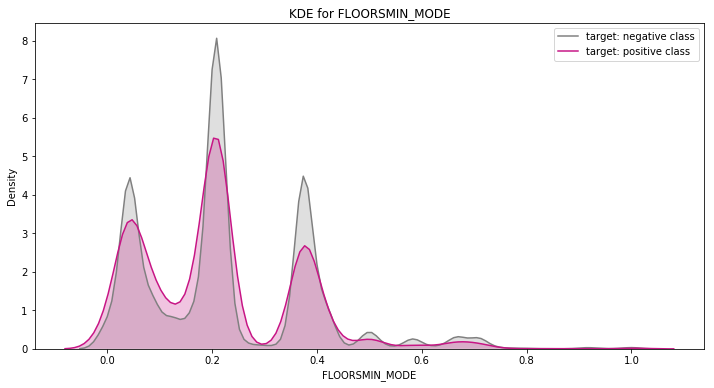

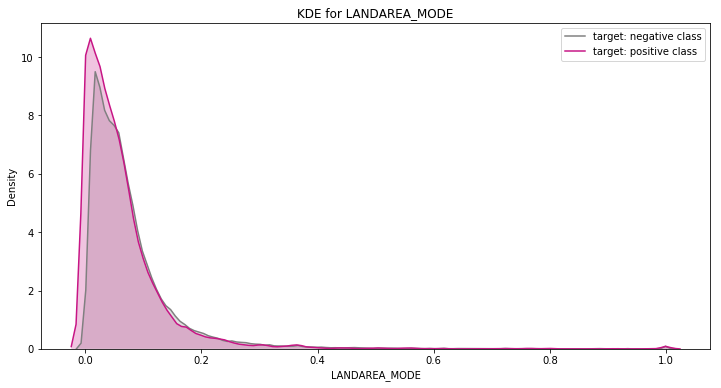

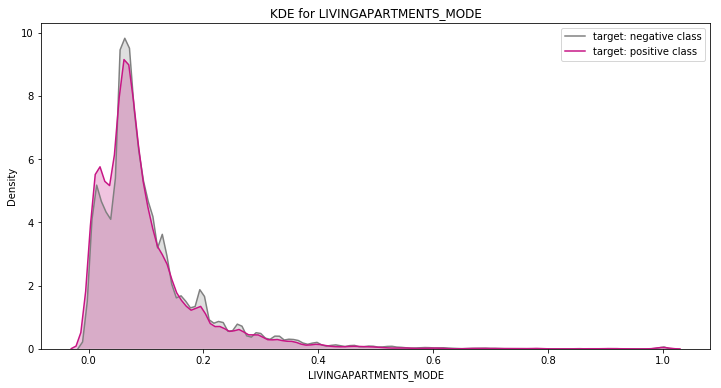

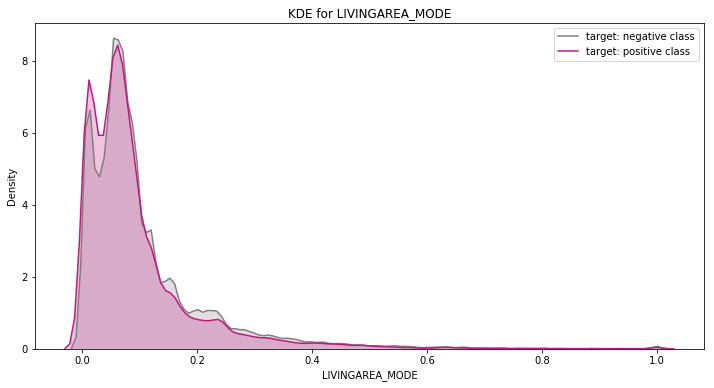

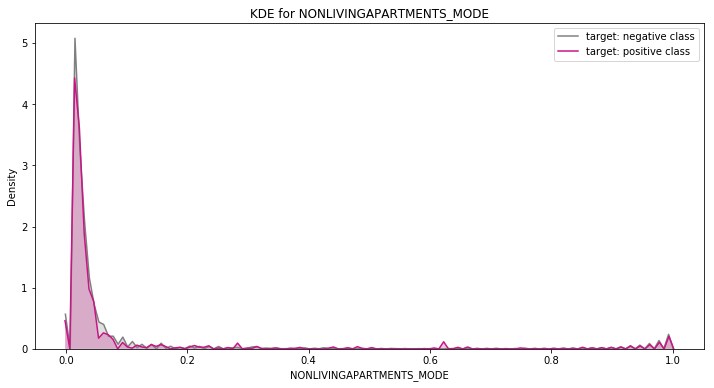

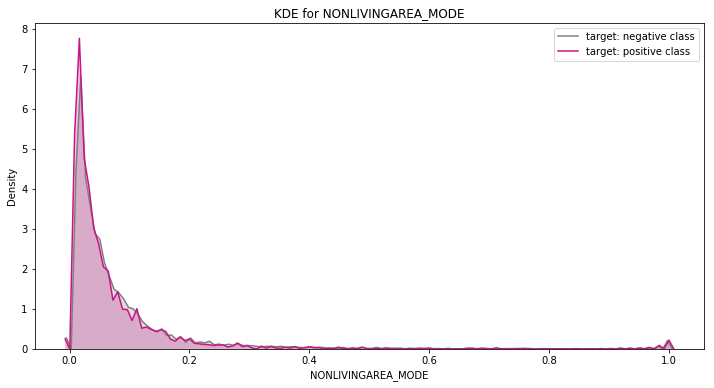

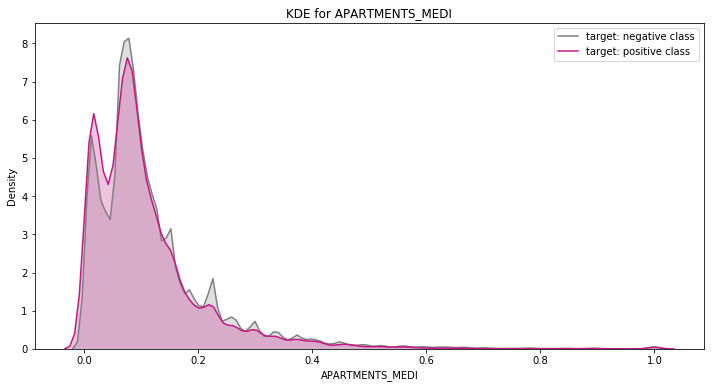

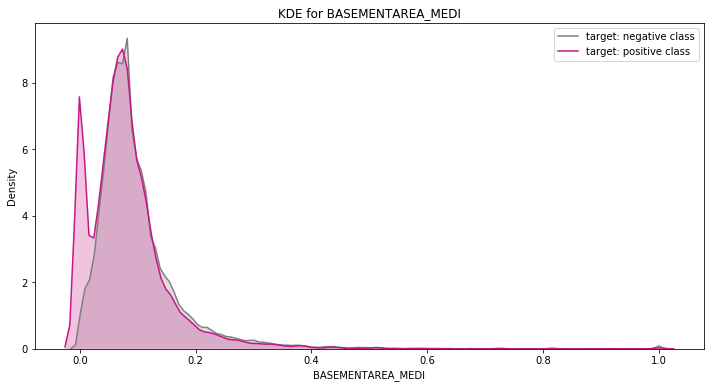

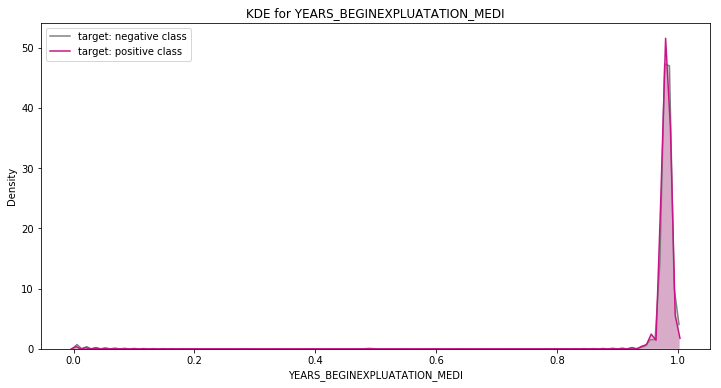

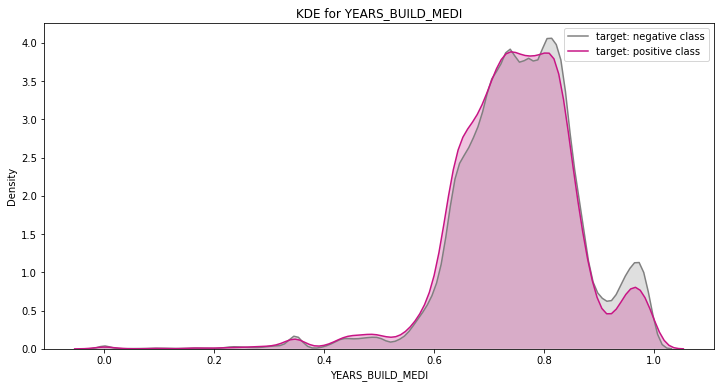

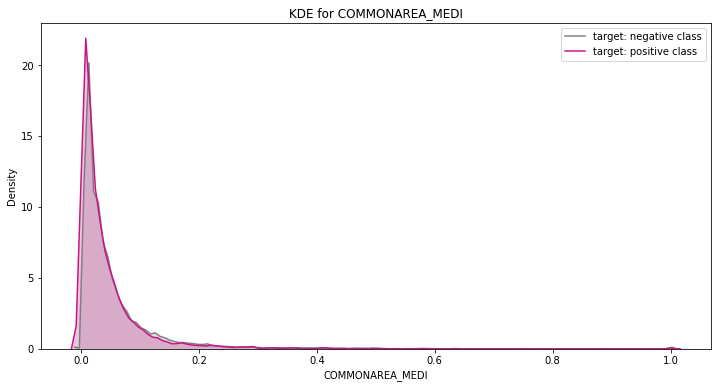

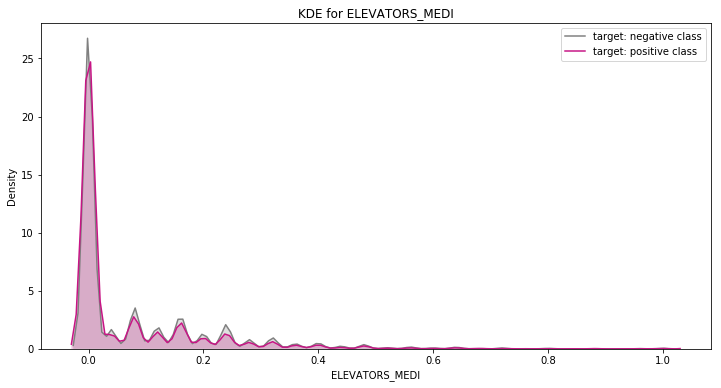

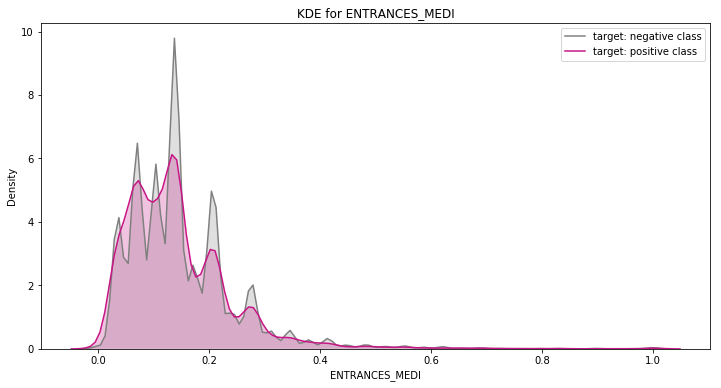

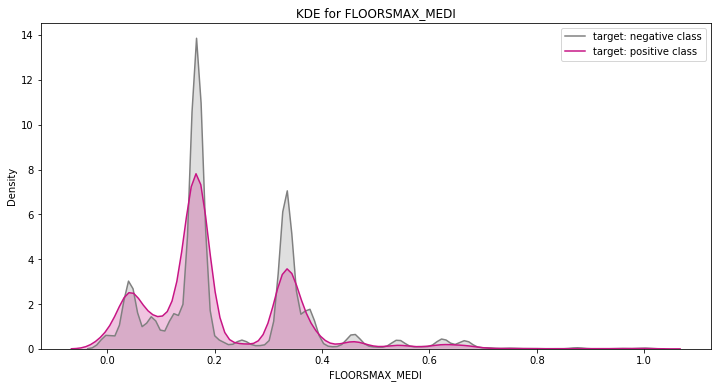

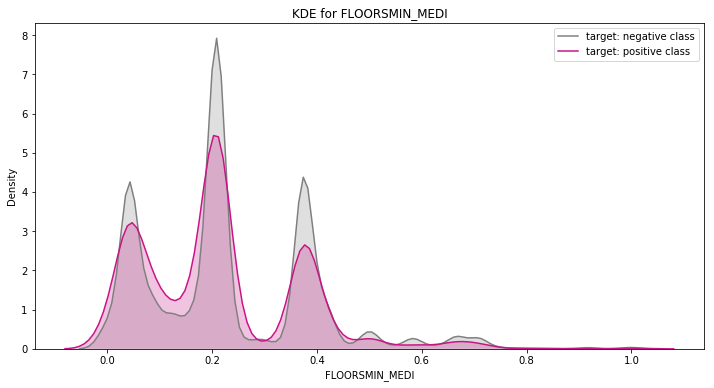

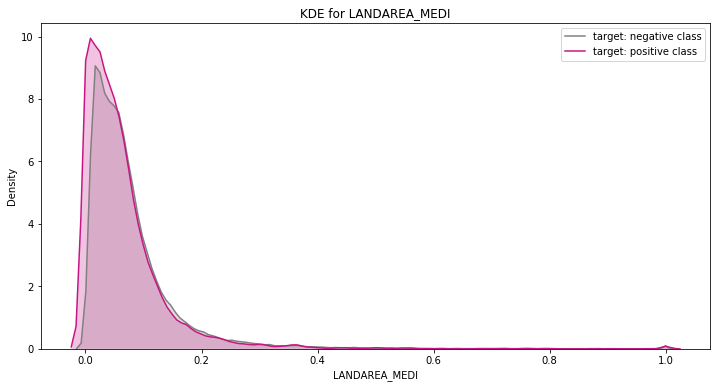

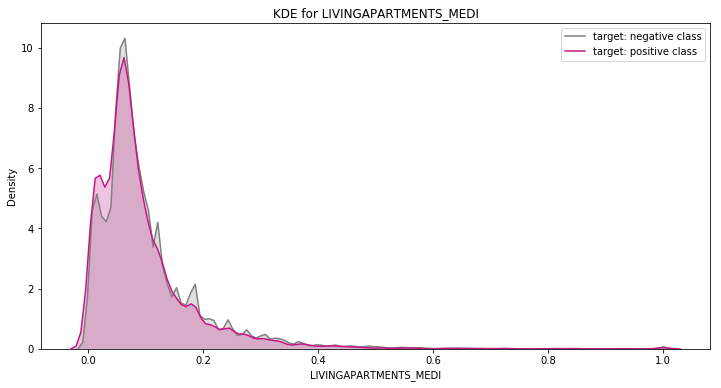

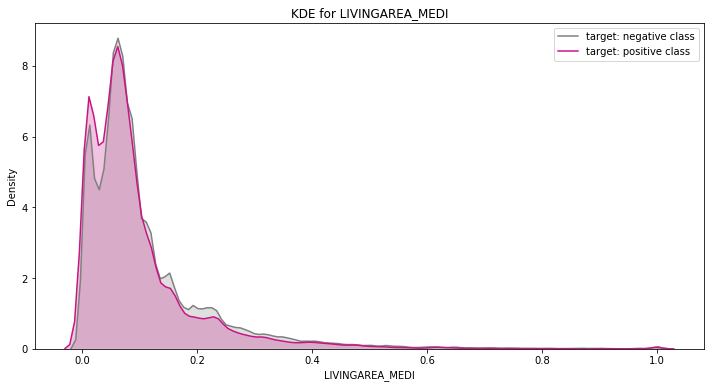

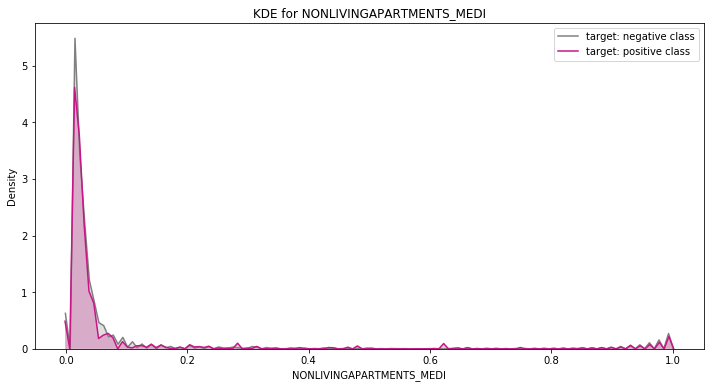

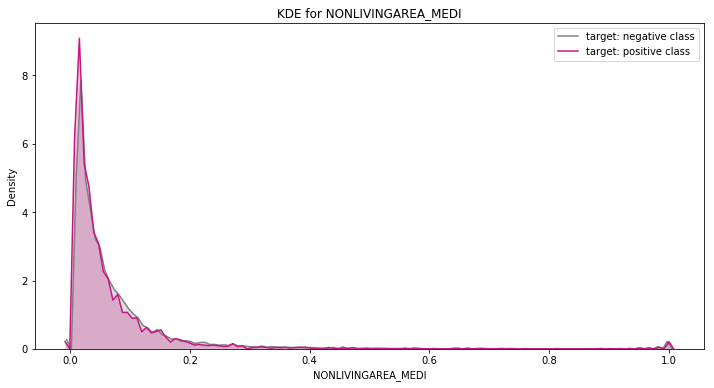

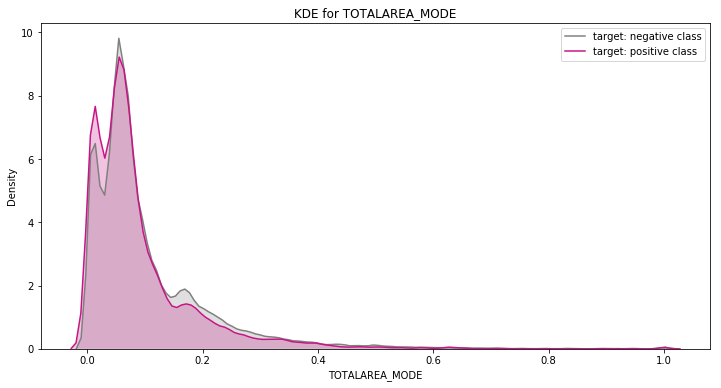

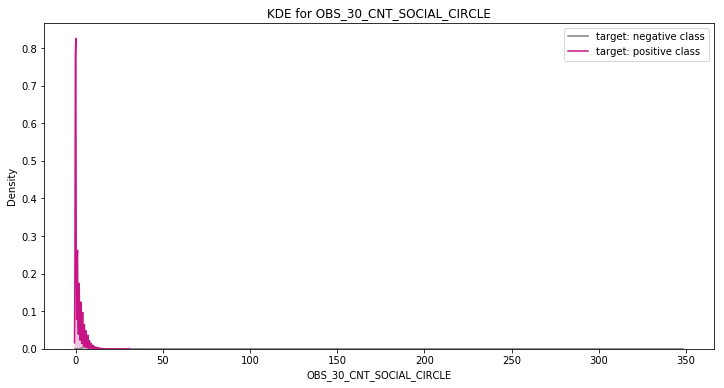

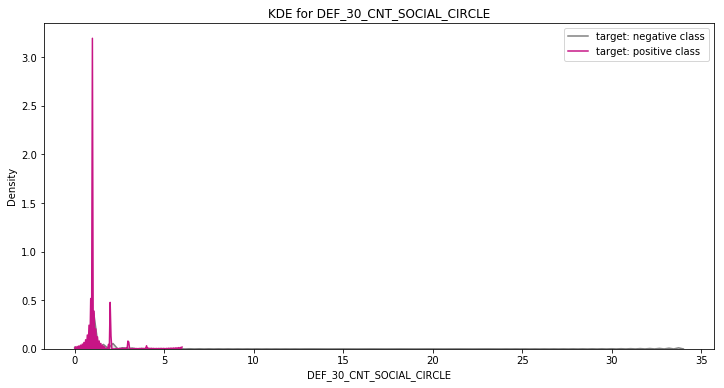

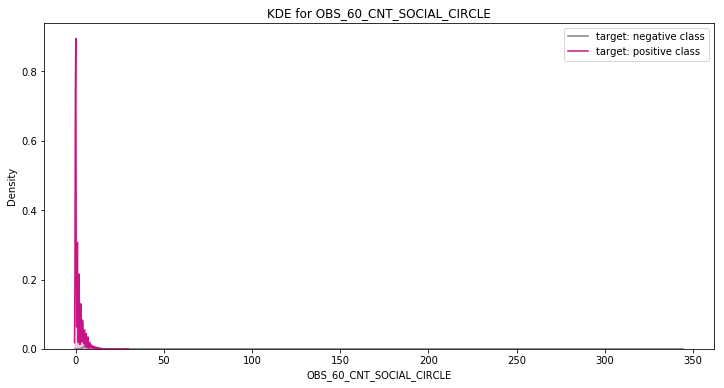

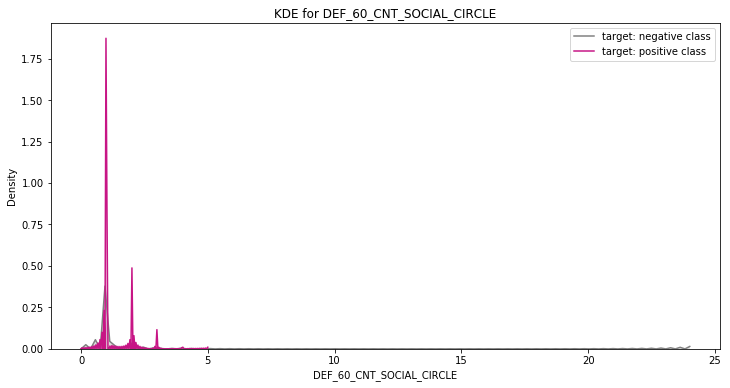

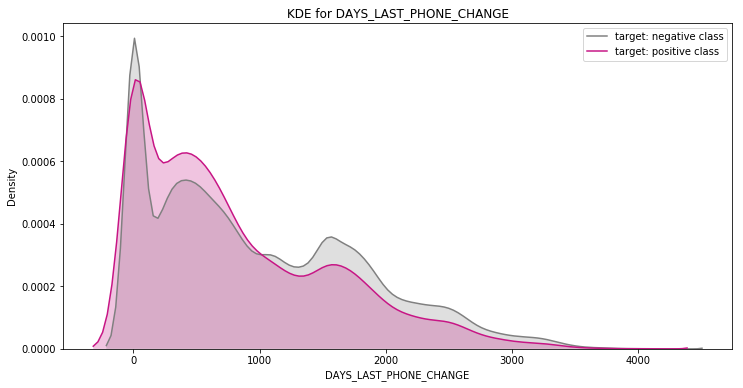

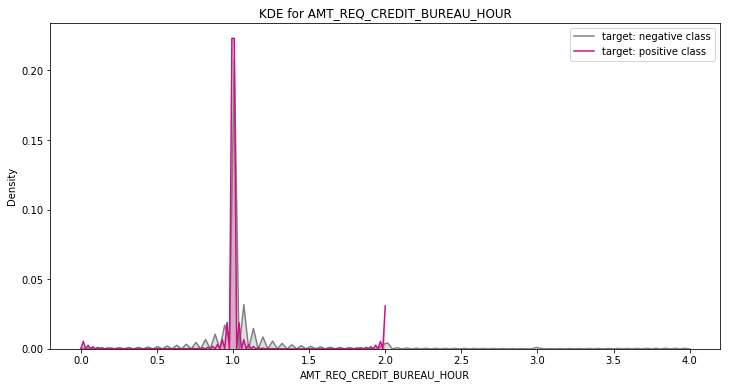

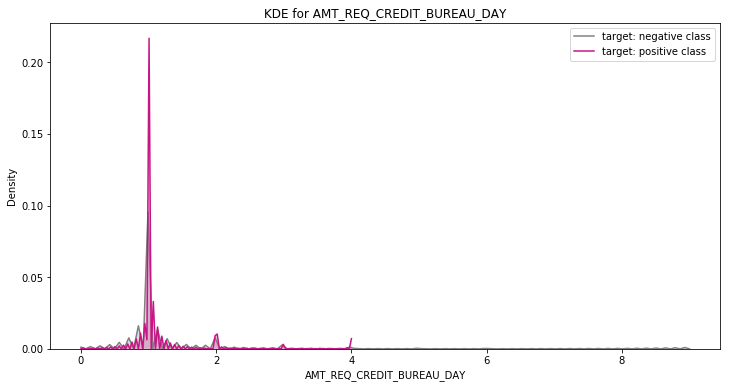

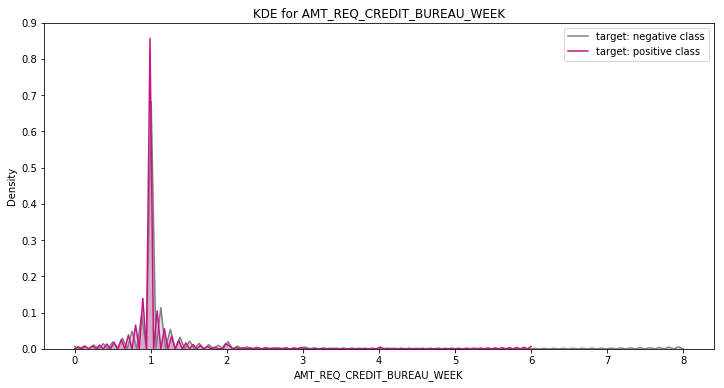

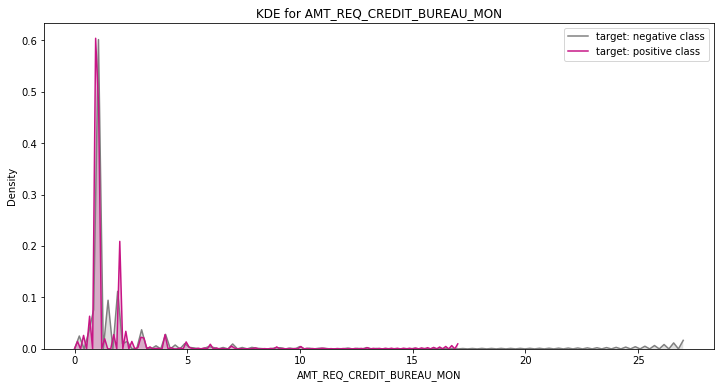

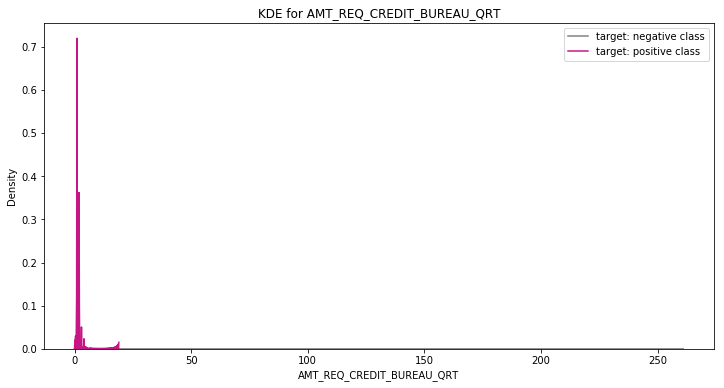

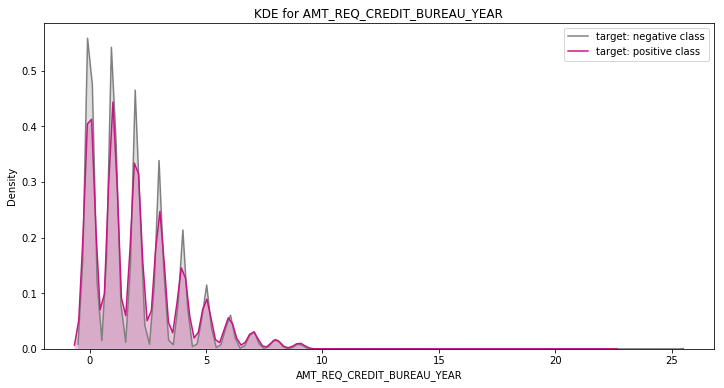

In [38]:
def plot_kde(dataframe, col, reverse_scale = False):
    
    plt.figure(figsize = (12, 6))
    
    if reverse_scale == True:
        order = -1
    else:
        order = 1
    
    # plot for loans that were repaid
    sns.kdeplot(dataframe.loc[dataframe['TARGET'] == 0, col] * order, label = 'target: negative class', color = 'gray', shade = True)

    # plot of loans that were defaulted
    sns.kdeplot(dataframe.loc[dataframe['TARGET'] == 1, col] * order, label = 'target: positive class', color = 'mediumvioletred', shade = True)

    plt.xlabel('{}'.format(col)); plt.ylabel('Density'); plt.title('KDE for {}'.format(col));
    plt.show()
    plt.close()
app_train_float_target_df = pd.concat([app_train_df['TARGET'], app_train_float_df], axis=1)
for col in app_train_float_df.columns.values:
    if (original_app_train_df[col].median() < 0):
        plot_kde(app_train_float_target_df,col, reverse_scale = True)
    else:
        plot_kde(app_train_float_target_df,col)
            
            

<b>Finding Outliers in Numerical data</b>

In [33]:
def outliers_stats(dataframe, column):
    
    print(f'Summary Stats: {column}\n')
    print(dataframe[column].describe())

    # mean and standard deviation
    outlier_dataframe = dataframe[column]
    standard_dev = outlier_dataframe.std()
    print('\nStandard Deviation: ', standard_dev)
    mean =  outlier_dataframe.mean()
    print('Mean: ', mean)
    maximum = outlier_dataframe.max()
    minimum = outlier_dataframe.min()
    max_std_dev_away_outlier = int((maximum - mean) / standard_dev)
    min_std_dev_away_outlier = int((mean - minimum) / standard_dev)
    # outliers over 2 std away from mean
    low_outliers = outlier_dataframe[(outlier_dataframe < mean - 2 * standard_dev)]
    high_outliers = outlier_dataframe[(outlier_dataframe > mean + 2 * standard_dev)]
    print('\n{} low outliers for {} attribute'.format(len(low_outliers), column ))    
    print('{} high outliers for {} attribute'.format(len(high_outliers), column ))
    print('max outlier is {} standard deviations away from the mean'.format(max_std_dev_away_outlier))
    print('min outlier is {} standard deviations away from the mean'.format(min_std_dev_away_outlier))
    
    print("\n--------------------------------------------------\n")


In [34]:
for col in app_train_float_df.columns:
    outliers_stats(app_train_float_df, col)   

Summary Stats: AMT_INCOME_TOTAL

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

Standard Deviation:  237123.14627883647
Mean:  168797.9192969845

0 low outliers for AMT_INCOME_TOTAL attribute
1438 high outliers for AMT_INCOME_TOTAL attribute
max outlier is 492 standard deviations away from the mean
min outlier is 0 standard deviations away from the mean

--------------------------------------------------

Summary Stats: AMT_CREDIT

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

Standard Deviation:  402490.776995946
Mean:  599025.9997057016

0 low outliers for AMT_CREDIT attribute
12999 high outliers for AMT_CREDIT attribute
max outlier is 8 standard deviations

count    143620.000000
mean          0.078942
std           0.134576
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64

Standard Deviation:  0.13457600110026235
Mean:  0.07894151232418305

0 low outliers for ELEVATORS_AVG attribute
7425 high outliers for ELEVATORS_AVG attribute
max outlier is 6 standard deviations away from the mean
min outlier is 0 standard deviations away from the mean

--------------------------------------------------

Summary Stats: ENTRANCES_AVG

count    152683.000000
mean          0.149725
std           0.100049
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64

Standard Deviation:  0.1000491207603038
Mean:  0.1497246700681123

0 low outliers for ENTRANCES_AVG attribute
4966 high outliers for ENTRANCES_AVG attribute
max outlier is 8 standard deviations away from 

count    154491.000000
mean          0.222315
std           0.143709
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_MODE, dtype: float64

Standard Deviation:  0.1437094065953209
Mean:  0.22231504747867964

0 low outliers for FLOORSMAX_MODE attribute
6940 high outliers for FLOORSMAX_MODE attribute
max outlier is 5 standard deviations away from the mean
min outlier is 1 standard deviations away from the mean

--------------------------------------------------

Summary Stats: FLOORSMIN_MODE

count    98869.000000
mean         0.228058
std          0.161160
min          0.000000
25%          0.083300
50%          0.208300
75%          0.375000
max          1.000000
Name: FLOORSMIN_MODE, dtype: float64

Standard Deviation:  0.16115977149541197
Mean:  0.22805849255070593

0 low outliers for FLOORSMIN_MODE attribute
4145 high outliers for FLOORSMIN_MODE attribute
max outlier is 4 standard deviations away from 

count    124921.000000
mean          0.067169
std           0.082167
min           0.000000
25%           0.018700
50%           0.048700
75%           0.086800
max           1.000000
Name: LANDAREA_MEDI, dtype: float64

Standard Deviation:  0.08216701028006211
Mean:  0.06716874904939986

0 low outliers for LANDAREA_MEDI attribute
4317 high outliers for LANDAREA_MEDI attribute
max outlier is 11 standard deviations away from the mean
min outlier is 0 standard deviations away from the mean

--------------------------------------------------

Summary Stats: LIVINGAPARTMENTS_MEDI

count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64

Standard Deviation:  0.09364233271154587
Mean:  0.10195447324073251

0 low outliers for LIVINGAPARTMENTS_MEDI attribute
4434 high outliers for LIVINGAPARTMENTS_MEDI attribute
max outlier is 9 sta

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

Standard Deviation:  0.7940556483196873
Mean:  0.26547414959848414

0 low outliers for AMT_REQ_CREDIT_BUREAU_QRT attribute
16713 high outliers for AMT_REQ_CREDIT_BUREAU_QRT attribute
max outlier is 328 standard deviations away from the mean
min outlier is 0 standard deviations away from the mean

--------------------------------------------------

Summary Stats: AMT_REQ_CREDIT_BUREAU_YEAR

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Standard Deviation:  1.869294998182222
Mean:  1.899974435321363

0 low outliers for AMT_REQ_CREDIT_BUREAU_YEAR attribute
14200 high outliers

<b>Categorical Plots</b>

In [71]:
def categorical_plot(df, attribute):
    
    plt.figure(figsize = (11, 5))
    
    df_high = df[df['TARGET'] == 1].groupby(attribute)['TARGET'].agg('count')
    df_var = df.groupby(attribute)['TARGET'].agg('count')
    categorical = df_high.divide(df_var, fill_value = 0) * 100

    # Convert back to df
    df_categorical = categorical.to_frame().reset_index().sort_values('TARGET', ascending = True)

    # Create plot in Plotly for interactive visualisation (with some Starling colours)
    ax = df_categorical.plot(x = attribute, y = 'TARGET', kind = 'barh', figsize=(10,10), color = 'palevioletred')
    ax.set_xlabel('Target: Positive %')
    ax.set_ylabel(attribute)
    plt.title('% postive plot for {}'.format(attribute.lower()));
    plt.show()
    plt.close()


<Figure size 792x360 with 0 Axes>

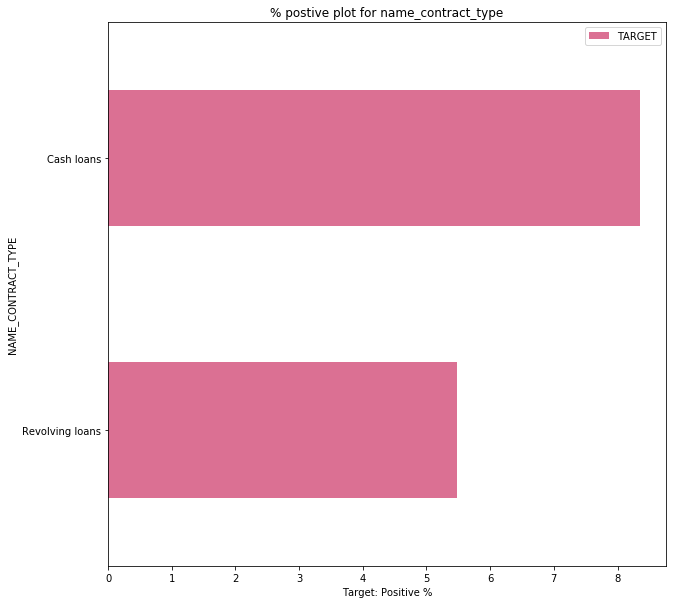

<Figure size 792x360 with 0 Axes>

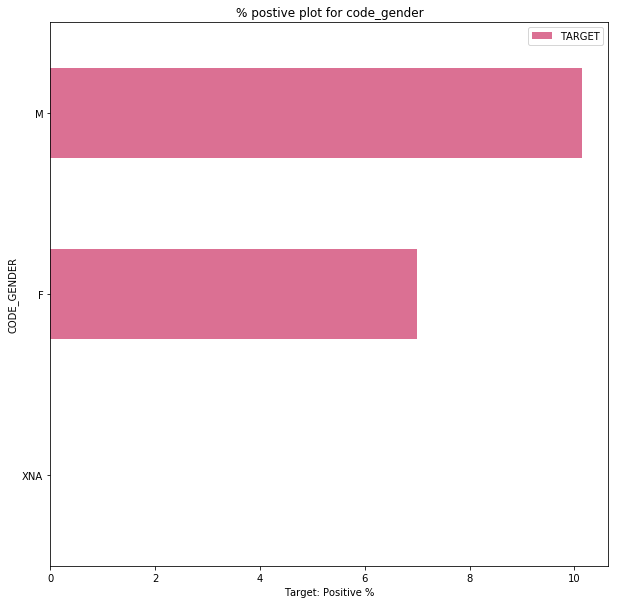

<Figure size 792x360 with 0 Axes>

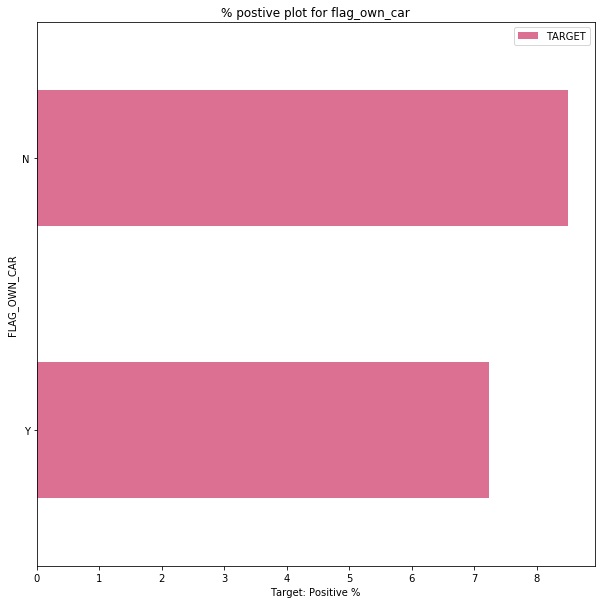

<Figure size 792x360 with 0 Axes>

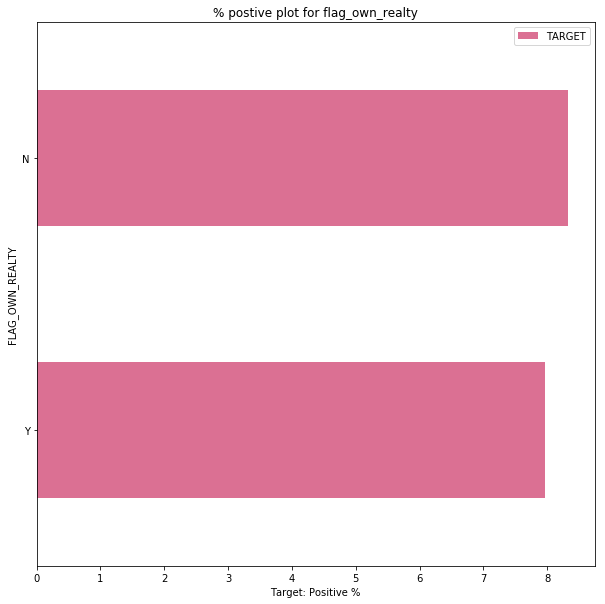

<Figure size 792x360 with 0 Axes>

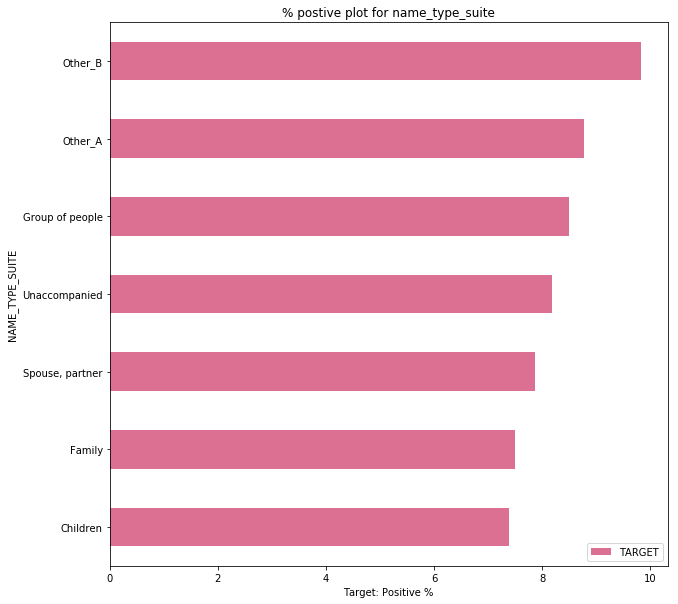

<Figure size 792x360 with 0 Axes>

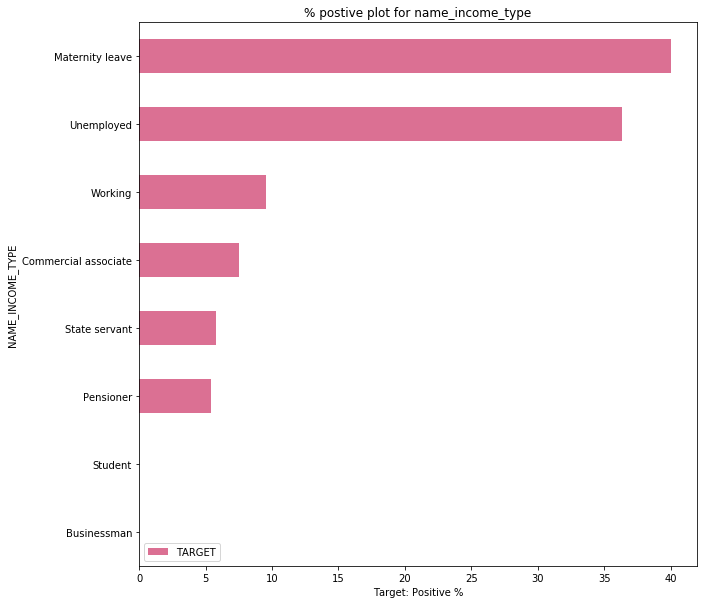

<Figure size 792x360 with 0 Axes>

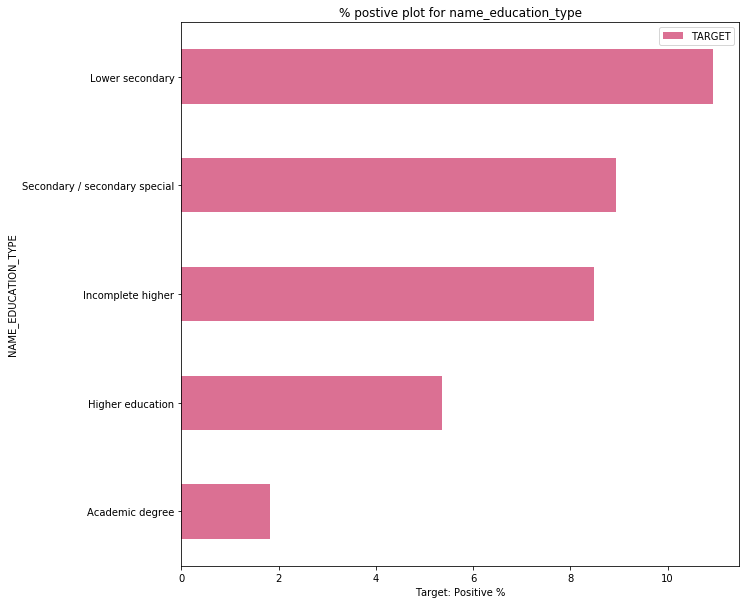

<Figure size 792x360 with 0 Axes>

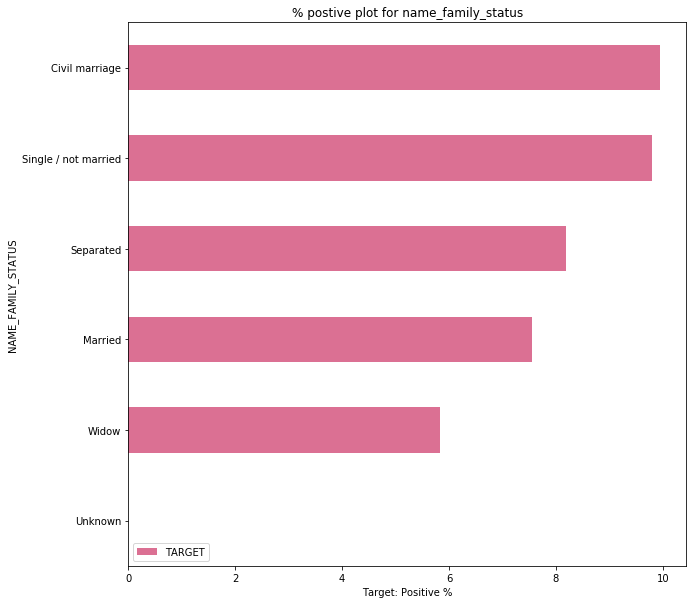

<Figure size 792x360 with 0 Axes>

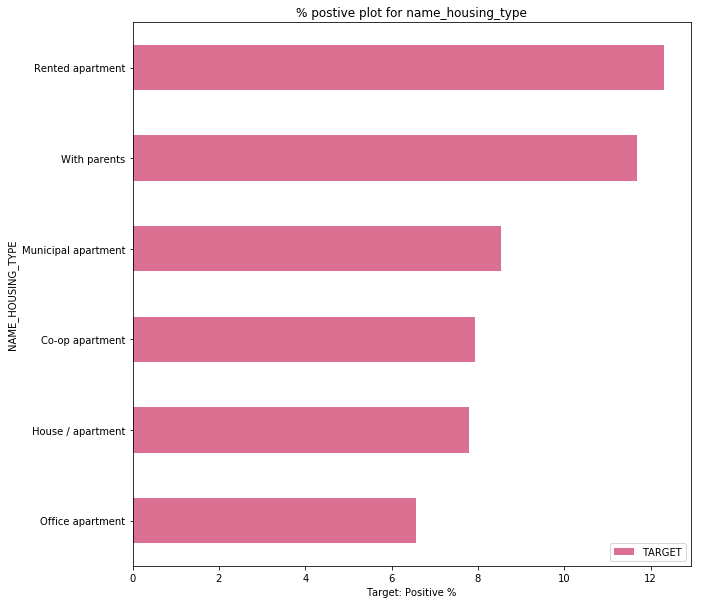

<Figure size 792x360 with 0 Axes>

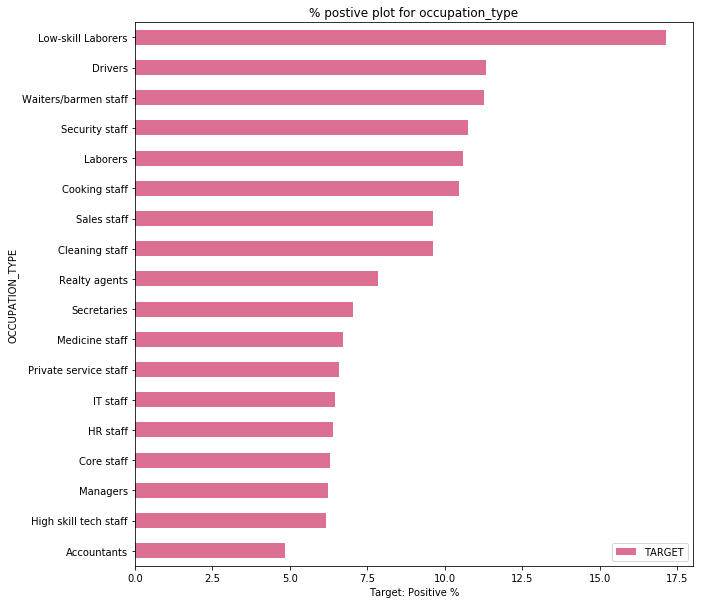

<Figure size 792x360 with 0 Axes>

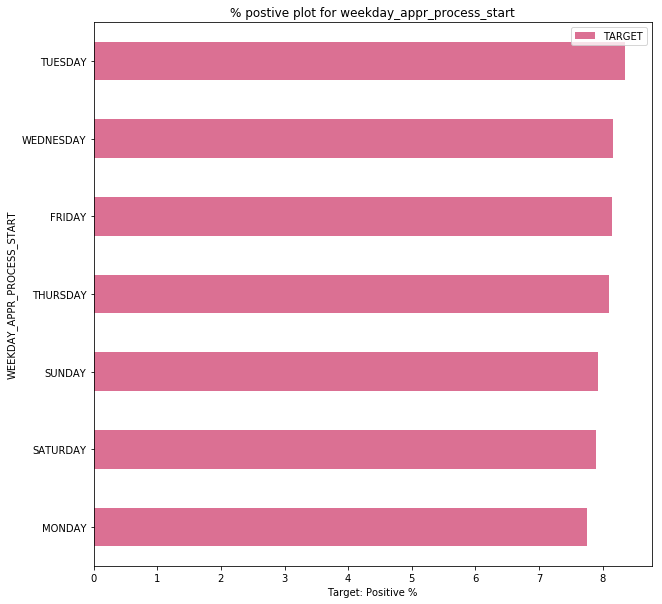

<Figure size 792x360 with 0 Axes>

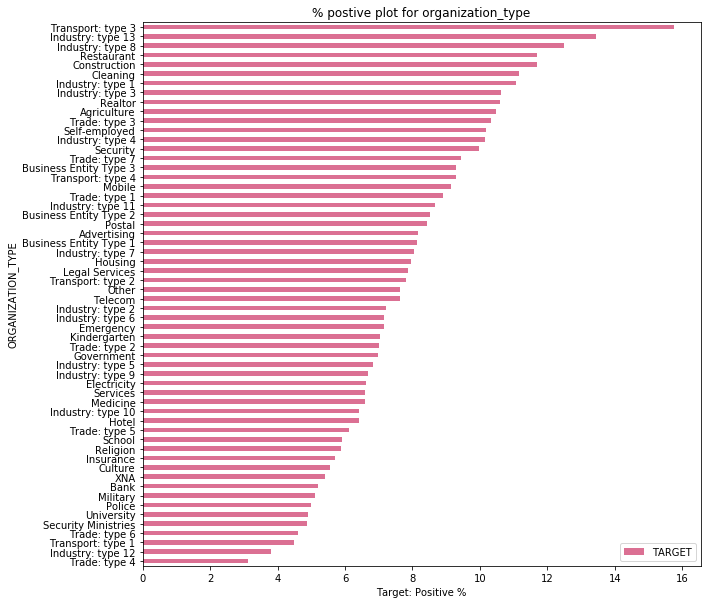

<Figure size 792x360 with 0 Axes>

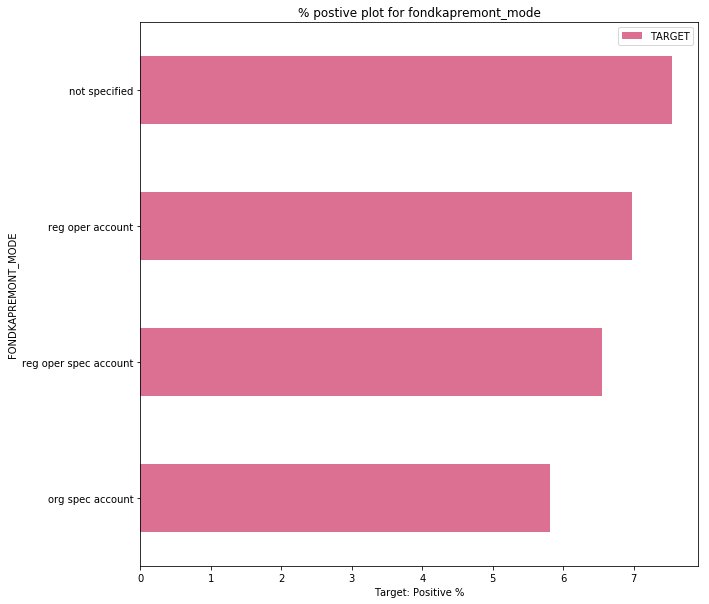

<Figure size 792x360 with 0 Axes>

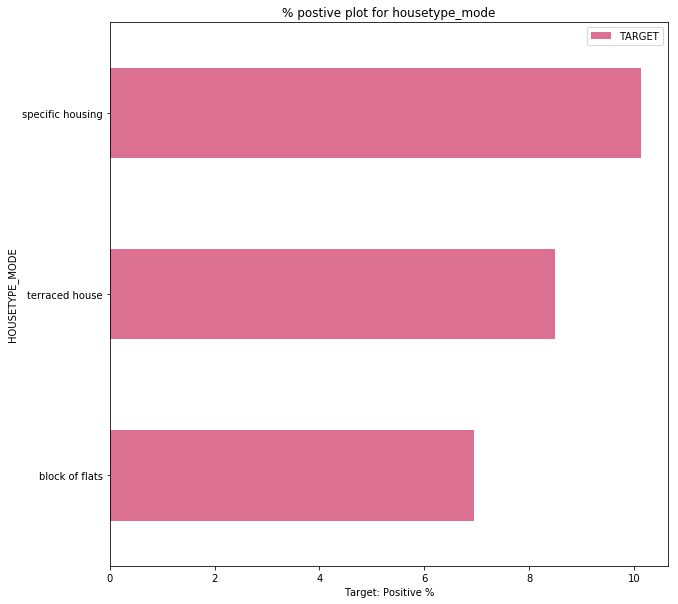

<Figure size 792x360 with 0 Axes>

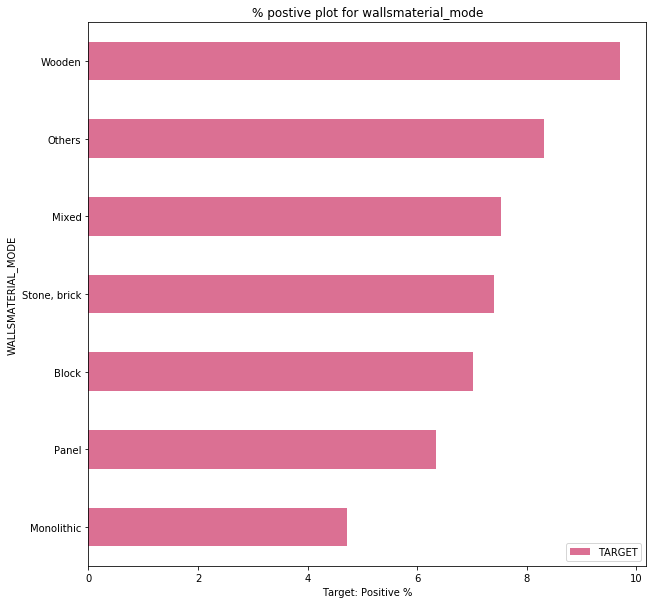

<Figure size 792x360 with 0 Axes>

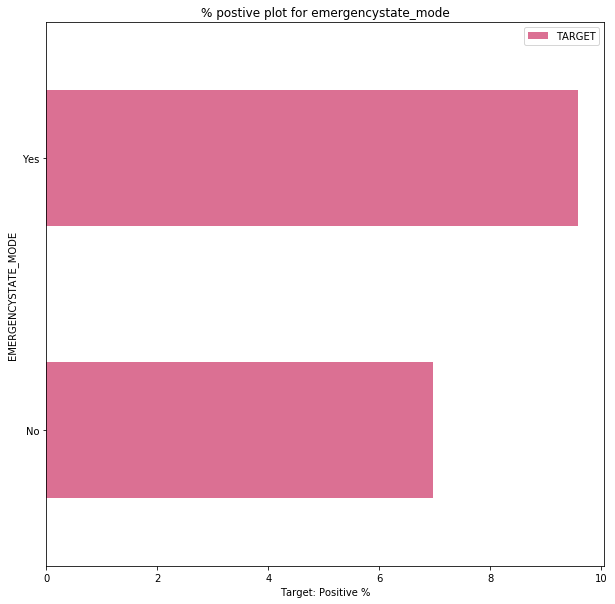

In [72]:
for column in original_app_train_df.loc[:, original_app_train_df.dtypes == np.object].columns.values:
    categorical_plot(original_app_train_df, column)

<b>Co-relations</b>

In [78]:
#Finding corelations with 'TARGET'
correlations = app_train_df.corr()['TARGET']


--> Features with least co-realtions (most important for prediction)

In [81]:
correlations.sort_values(ascending=True).head(20)

EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046209
ORGANIZATION_TYPE_XNA                  -0.045987
DAYS_EMPLOYED                          -0.044932
FLOORSMAX_AVG                          -0.044003
FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_MODE                         -0.043226
EMERGENCYSTATE_MODE_No                 -0.042201
HOUSETYPE_MODE_block of flats          -0.040594
AMT_GOODS_PRICE                        -0.039645
REGION_POPULATION_RELATIVE             -0.037227
ELEVATORS_AVG                          -0.034199
ELEVATORS_MEDI                         -0.033863
FLOORSMIN_AVG                          -0.033614
FLOORSMIN_MEDI                         -0.033394
WALLSMATERIAL_MODE_Panel               -0.033119
Name: TARGET, dtype:

<b>Model Fitting</b>

1. Creating testing and training dfs

In [82]:
X_train = app_train_df.drop('TARGET', axis = 1)
y_train = app_train_df['TARGET']
X_test = app_test_df

X_train = X_train.drop('SK_ID_CURR', axis = 1)
X_test = X_test.drop('SK_ID_CURR', axis = 1)

2. Fill missing values and Scale

In [84]:
#imputing missing values
imputer = Imputer(strategy = 'median')

#Normalize each feature between 0-1
scaler = MinMaxScaler(feature_range = (0,1))

In [85]:
#fit imputer on training data
imputer.fit(X_train)

#Transform training and testing data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

scaler.fit(X_train)
train = scaler.transform(X_train)
test = scaler.transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (307511, 238)
Testing data shape:  (48744, 238)


<b>Storing Intermediate results</b>

In [93]:
xtrain = pd.DataFrame(data=X_train)
xtrain.to_csv(r'./data/preprocessed/X_train.csv')

ytrain = pd.DataFrame(data=y_train)
ytrain.to_csv(r'./data/preprocessed/y_train.csv')

xtest = pd.DataFrame(data=X_test)
xtest.to_csv(r'./data/preprocessed/X_test.csv')

In [86]:
# num_folds = 5
# seed = 1
# scoring = 'roc_auc'

# predictors = []

# predictors.append(('LR', LogisticRegression()))
# predictors.append(('KNN', KNeighborsClassifier()))
# predictors.append(('DTC', DecisionTreeClassifier()))
# predictors.append(('GNB', GaussianNB()))
# predictors.append(('RF', RandomForestClassifier()))

# results = []
# names = []

# for name, predictor in predictors:
#     start = time.time()
    
#     kfold = KFold(n_splits=num_folds, random_state=seed)
#     cv_results = cross_val_score(predictor, X_train, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
    
#     end = time.time()
#     runtime = (end-start)/60
#     print(f'{name}:-->   auroc: {cv_results.mean()}  Training time: {runtime}')

LR:-->   auroc: 0.6221113420450624  Training time: 0.44789480765660605
KNN:-->   auroc: 0.5526574419829805  Training time: 2.729681468009949
DTC:-->   auroc: 0.5384532374377887  Training time: 2.0535091678301494
GNB:-->   auroc: 0.6031644307691507  Training time: 0.1379533807436625
RF:-->   auroc: 0.6291616399558061  Training time: 0.8249974091847737
